## prework

* load basic dependencies
* load data
* check data

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/salary-prediction/train.csv
/kaggle/input/salary-prediction/test.csv


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from numpy.linalg import inv, qr

In [3]:
train = pd.read_csv('/kaggle/input/salary-prediction/train.csv')
test = pd.read_csv('/kaggle/input/salary-prediction/test.csv')
train.shape, test.shape

((32561, 15), (16281, 14))

In [4]:
# check data
def show_info(data, is_matrix_transpose=False):
    # basic shape
    print('data shape is: {}   sample number {}   attribute number {}\n'.format(data.shape, data.shape[0], data.shape[1]))
    # attribute(key)
    print('data columns number {}  \nall columns: {}\n'.format(len(data.columns) ,data.columns))
    # value's null
    print('data all attribute count null:\n', data.isna().sum())
    # data value analysis and data demo
    if is_matrix_transpose:
        print('data value analysis: ', data.describe().T)
        print('data demo without matrix transpose: ', data.head().T)
    else:
        print('data value analysis: ', data.describe())
        print('data demo without matrix transpose: ', data.head())
show_info(train)
show_info(test)

data shape is: (32561, 15)   sample number 32561   attribute number 15

data columns number 15  
all columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

data all attribute count null:
 age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64
data value analysis:                  age        fnlwgt  education_num  capital_gain  capital_loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e

In [5]:
train.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
test.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States


## data preprocessing

* extract target column
* encoding
    * concat
    * select categorical data and numerical data
    * encode columns
    * split train and test

In [7]:
target = pd.DataFrame(train['income'].map({' <=50K': 0, ' >50K': 1}))
target

,income
0,0
1,0
2,0
3,0
4,0
...,...
32556,0
32557,1
32558,0
32559,0


In [8]:
# concat train and test
train = train.drop(['income'], axis=1)
data = pd.concat([train, test], axis=0)
data.shape

(48842, 14)

CPU times: user 43.6 s, sys: 916 ms, total: 44.5 s
Wall time: 44.6 s


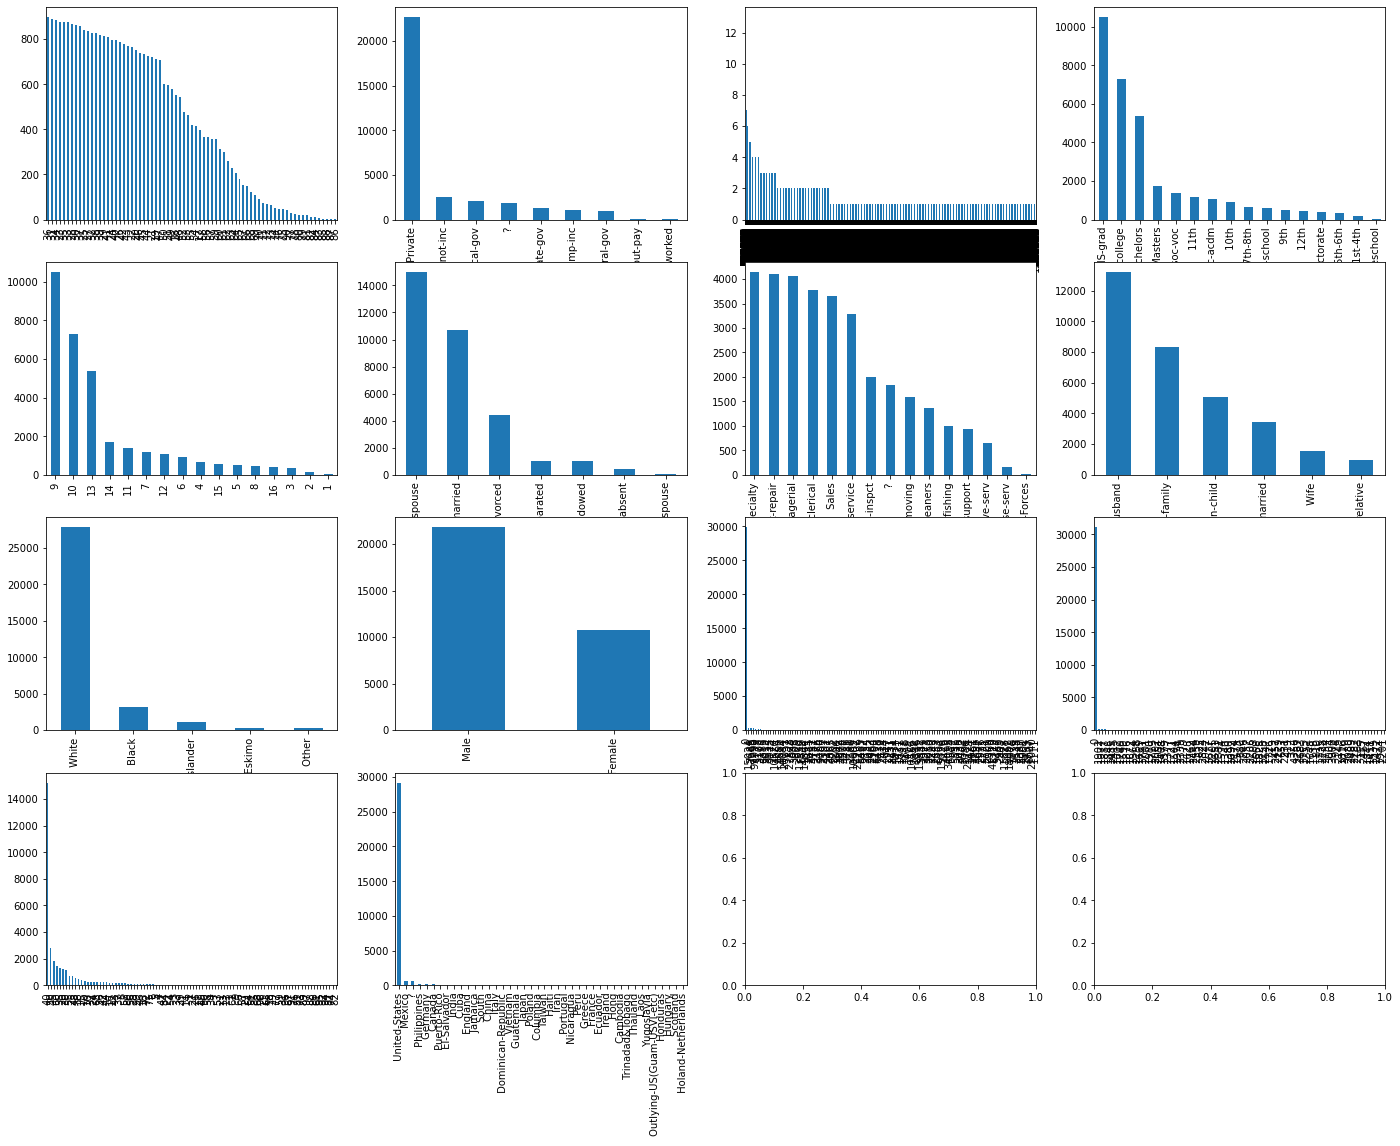

In [9]:
%%time

# EDA
f, axes = plt.subplots(4, 4, figsize=(24, 18))
for i, col in enumerate(train.columns):
    train[col].value_counts().plot.bar(ax=axes[i // 4][i % 4])

In [10]:
train.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country'],
      dtype='object')

### encode columns

* attribute 'sex' => map to 1 and 0
* then select categorical data and numerical data
    * categorical data: ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'native_country']
    * numerical data: ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
* process data
    * categorical data => one-hot encoding
    * numerical data => normalization
* some other process
    * remove special col ['naive_country_ Holand-Netherlands']

In [11]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [12]:
data.sex.values

array([' Male', ' Male', ' Male', ..., ' Male', ' Male', ' Male'],
      dtype=object)

~~可以注意到所有性别里边都是有一个空格的，所以在下边映射的时候要添加空格~~

`' Male'`

`' Female'`

In [13]:
# attribute 'sex' labelencode
data['sex'] = data['sex'].map({' Male': 1, ' Female': 0})
data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,0,0,0,36,United-States
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,1,0,0,40,United-States
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,1,0,0,50,United-States
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,1,5455,0,40,United-States


In [14]:
categorical_cols = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'native_country']
numerical_cols = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

# then encode categorical data
for col in categorical_cols:
    new = pd.get_dummies(data[col], prefix=col)
    data = pd.concat([data, new], axis=1)
    data = data.drop([col], axis=1)
data.shape

(48842, 107)

In [15]:
# normalize numerical data
for col in numerical_cols:
    data[col] = (data[col] - data[col].mean()) / data[col].std()
data

,age,fnlwgt,education_num,sex,capital_gain,capital_loss,hours_per_week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,0.025996,-1.061968,1.136500,1,0.146931,-0.217125,-0.034087,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.828300,-1.007094,1.136500,1,-0.144802,-0.217125,-2.213009,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,-0.046941,0.246031,-0.419331,1,-0.144802,-0.217125,-0.034087,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1.047110,0.426659,-1.197247,1,-0.144802,-0.217125,-0.034087,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,-0.776309,1.408515,1.136500,0,-0.144802,-0.217125,-0.034087,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,0.025996,0.243881,1.136500,0,-0.144802,-0.217125,-0.356890,0,0,0,...,0,0,0,0,0,0,0,1,0,0
16277,1.849414,1.247480,-0.419331,1,-0.144802,-0.217125,-0.034087,1,0,0,...,0,0,0,0,0,0,0,1,0,0
16278,-0.046941,1.754847,1.136500,1,-0.144802,-0.217125,0.772922,0,0,0,...,0,0,0,0,0,0,0,1,0,0
16279,0.390679,-1.001601,1.136500,1,0.587214,-0.217125,-0.034087,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [16]:
# remove special
data = data.drop(['native_country_ Holand-Netherlands'], axis=1)
data.shape

(48842, 106)

107->106

In [17]:
# split train and test data
train = data.iloc[:len(train), :]
test = data.iloc[len(train):, :]
train.shape, test.shape

((32561, 106), (16281, 106))

In [18]:
target.shape

(32561, 1)

In [19]:
# extract class_0 and class_1 data
class_0 = train.iloc[target[target.income==0].index, :]
class_1 = train.iloc[target[target.income==1].index, :]
class_0.shape, class_1.shape

((24720, 106), (7841, 106))

## Model

Probabilistic generative model

* train_test_split 30000 => 0.2
    * method_1: artificial (sequential extraction)
    * method_2: by using sklearn
* Gaussian Distribution parameters


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
# train_test_split

# artificial
def split_valid_set(X, y, valid_set_percentage):
    num = int(len(X)*(1-valid_set_percentage))
    return X.iloc[:num, :], y.iloc[:num, :], X.iloc[num:, :], y.iloc[num:, :]

X_train, y_train, X_val, y_val = split_valid_set(train, target, 0.2)
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((26048, 106), (26048, 1), (6513, 106), (6513, 1))

In [22]:
# use train_test_split
X_train, X_val, y_train, y_val = train_test_split(train, target, test_size=0.2)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((26048, 106), (6513, 106), (26048, 1), (6513, 1))

In [23]:
# Encapsulate the train function
def train(X_train, y_train):
    '''
    init params
    '''
    cnt1 = 0
    cnt2 = 0
    mu1 = np.zeros((106, ))
    mu2 = np.zeros((106, ))
    train_data_size = X_train.shape[0]
    
    '''
    Gaussian distribution 
    '''
    for i in range(train_data_size):
        if y_train[i] == 1:
            mu1 += X_train[i]
            cnt1 += 1
        else:
            mu2 += X_train[i]
            cnt2 += 1
    mu1 /= cnt1
    mu2 /= cnt2
    
    '''
    init params
    '''
    sigma1 = np.zeros((106, 106))
    sigma2 = np.zeros((106, 106))
    '''
    compute
    '''
    for i in range(train_data_size):
        if y_train[i] == 1:
            sigma1 += np.dot(np.transpose([X_train[i] - mu1]), [X_train[i] - mu1])
        else:
            sigma2 += np.dot(np.transpose([X_train[i] - mu2]), [X_train[i] - mu2])
    sigma1 /= cnt1
    sigma2 /= cnt2
    shared_sigma = (float(cnt1) / train_data_size) * sigma1 + (float(cnt2) / train_data_size) * sigma2
    
    N1 = cnt1
    N2 = cnt2
    
    return mu1, mu2, shared_sigma, N1, N2

In [24]:
mean_0 = np.mean(class_0, axis=0)
mean_1 = np.mean(class_1, axis=0)

n = class_0.shape[1]
cov_0 = np.zeros((n, n))
cov_1 = np.zeros((n, n))

class_0 = class_0.to_numpy()
class_1 = class_1.to_numpy()

In [25]:
for i in range(class_0.shape[0]):
    cov_0 += np.dot(np.transpose([class_0[i] - mean_0]), [(class_0[i] - mean_0)]) / class_0.shape[0]
for i in range(class_1.shape[0]):
    cov_1 += np.dot(np.transpose([class_1[i] - mean_1]), [(class_1[i] - mean_1)]) / class_1.shape[0]
cov = (cov_0*class_0.shape[0] + cov_1*class_1.shape[0]) / (class_0.shape[0] + class_1.shape[0])

In [26]:
w = np.transpose((mean_0 - mean_1)).dot(inv(cov))
b = (-0.5)*mean_0.dot(inv(cov)).dot(mean_0) + 0.5*mean_1.dot(inv(cov)).dot(mean_1)\
    + np.log(float(class_0.shape[0]) / class_1.shape[0])
print(w)
print(b)

[-0.29747837 -0.06665299 -0.37012635 -0.50778098 -0.50404036 -0.32183847
 -0.30971165  0.11566764 -1.03613855 -0.16016427 -0.25238999 -0.41587411
 -0.93368696  0.14294189 -0.03138123  0.95264026  0.03830007 -0.02407662
 -0.06941131 -0.11649718 -0.04519932  0.37985893  0.19320101  0.04748232
 -0.11209174 -0.63633107 -1.94910839  0.17549984 -1.24895546 -0.33436123
 -1.63581924 -0.08897033  0.37997781 -1.17471979 -0.60712891  0.15063203
  0.45643867  0.27117341  0.21043125  0.03116556  0.17922304  1.34056991
  0.31419221 -0.93222296  1.08098153  0.67395304  0.60098309  0.3944139
  0.09926254 -0.39923892 -0.44777627 -0.16635973 -0.43505356  0.54362822
 -2.71320892 -1.32061879 -1.57926381 -1.54258435 -1.43984808 -3.70276047
  0.64414045  0.31684511  0.40440773  0.59332289  0.26833204 -1.09856329
 -2.69261783 -1.6696324  -0.66393018 -0.57960675 -1.457983   -1.0095229
 -1.22259495 -1.4398576  -1.78541564 -2.10002495 -1.80587917 -0.56737583
 -1.66136966 -1.25823916 -1.19348481 -1.18357257 -1.1

In [27]:
def predict(x, w, b):
    '''
    matrix calc
    1 w * x + b
    2 use sigmoid to [0, 1]
    '''
    arr = np.empty([x.shape[0], 1], dtype=float)
    for i in range(x.shape[0]):
        z = x[i, :].dot(w) + b
        z *= (-1)
        arr[i][0] = 1 / (1 + np.exp(z))
    chips = np.clip(arr, 1e-8, 1-(1e-8))

    '''
    set threshold to classify
    '''
    ans = np.ones([chips.shape[0], 1], dtype=int)
    for i in range(x.shape[0]):
        # print(chips[i])
        if chips[i] > 0.5:
            # print( '+' * 5 )
            ans[i] = 0
        else:
            # print( '-' * 5 )
            ans[i] = 1
    return ans


preds = predict(X_train.to_numpy(), w, b)

In [28]:
preds

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

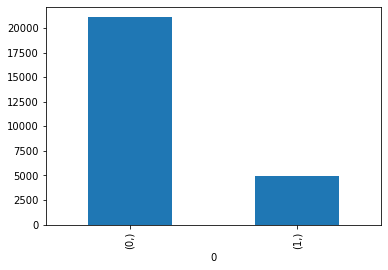

In [29]:
pd.DataFrame(preds).value_counts().plot.bar()

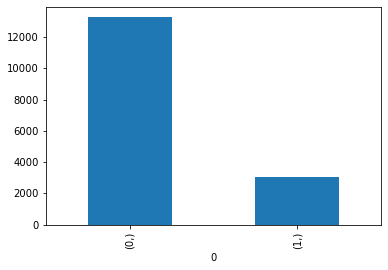

In [30]:
test_preds = predict(test.to_numpy(), w, b)
pd.DataFrame(test_preds).value_counts().plot.bar()